In [1]:
# ALL IMPORTS

# <!--BASIC & PANDAS: -->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# <!-- SQL: -->
import sqlite3 
conn = sqlite3.connect('data.db')
cur = conn.cursor()

# <!-- WEBSCARAPING AND APIs -->
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import time

In [2]:
df_100 = pd.read_csv('../df_100.csv')

In [3]:
df_100.genre_ids = df_100.genre_ids.apply(lambda x: eval(x))

In [4]:
genre_list = []
for genres in df_100.genre_ids:
    for genre in genres:
        if genre not in genre_list:
            genre_list.append(genre)

In [5]:
genre_list

['Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Thriller',
 'Family',
 'Animation',
 'Romance',
 'Comedy',
 'Crime',
 'Drama',
 'Music',
 'War',
 'Horror',
 'Western',
 'Mystery']

In [6]:
pd.options.display.max_columns = 100

In [7]:
for genre in genre_list:
    df_100[genre] = df_100['genre_ids'].apply(lambda x: genre in x)
    
df_100.head()

,Unnamed: 0,id,genre_ids,original_title,title,release_date,popularity,vote_average,vote_count,budget,revenue,imdb_id,originalTitle,startYear,genres,averageRating,numVotes,Gross Profit,Action,Adventure,Science Fiction,Fantasy,Thriller,Family,Animation,Romance,Comedy,Crime,Drama,Music,War,Horror,Western,Mystery
0,41,299534,"[Action, Adventure, Science Fiction]",Avengers: Endgame,Avengers: Endgame,2019-04-24,38.570,83.0,11389,356000000.0,2.797801e+09,tt4154796,Avengers: Endgame,2019.0,"Action,Adventure,Drama",8.5,674091,2.441801e+09,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3515,140607,"[Action, Adventure, Fantasy, Science Fiction]",Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,28.812,74.0,13865,245000000.0,2.068224e+09,tt2488496,Star Wars: Episode VII - The Force Awakens,2015.0,"Action,Adventure,Sci-Fi",7.9,827462,1.823224e+09,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,11,299536,"[Action, Adventure, Science Fiction]",Avengers: Infinity War,Avengers: Infinity War,2018-04-25,84.768,83.0,16897,300000000.0,2.046240e+09,tt4154756,Avengers: Infinity War,2018.0,"Action,Adventure,Sci-Fi",8.5,750111,1.746240e+09,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1658,135397,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,Jurassic World,2015-06-06,25.921,66.0,15085,150000000.0,1.671713e+09,tt0369610,Jurassic World,2015.0,"Action,Adventure,Sci-Fi",7.0,556879,1.521713e+09,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False
4,28,420818,"[Adventure, Family]",The Lion King,The Lion King,2019-07-12,39.216,71.0,4581,260000000.0,1.656943e+09,tt6105098,The Lion King,2019.0,"Adventure,Animation,Drama",6.9,169643,1.396943e+09,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [72]:
Mystery=df_100.loc[df_100['Mystery'] == True]
# Mystery['Gross Profit'].mean()
Mystery

,Unnamed: 0,id,genre_ids,original_title,title,release_date,popularity,vote_average,vote_count,budget,revenue,imdb_id,originalTitle,startYear,genres,averageRating,numVotes,Gross Profit,Action,Adventure,Science Fiction,Fantasy,Thriller,Family,Animation,Romance,Comedy,Crime,Drama,Music,War,Horror,Western,Mystery
82,111,439079,"[Horror, Mystery, Thriller]",The Nun,The Nun,2018-09-05,21.950,56.0,3423,22000000.0,365550119.0,tt5814060,The Nun,2018.0,"Horror,Mystery,Thriller",5.3,105128,343550119.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
93,1674,392044,"[Crime, Drama, Mystery]",Murder on the Orient Express,Murder on the Orient Express,2017-11-03,17.513,67.0,6175,55000000.0,351839303.0,tt3402236,Murder on the Orient Express,2017.0,"Crime,Drama,Mystery",6.5,192933,296839303.0,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
96,2718,396422,"[Horror, Mystery, Thriller]",Annabelle: Creation,Annabelle: Creation,2017-08-03,16.383,65.0,3612,15000000.0,305092201.0,tt5140878,Annabelle: Creation,2017.0,"Horror,Mystery,Thriller",6.5,102780,290092201.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True


In [35]:
df_gp = pd.read_csv('gp.csv')

In [48]:
df_gp = df_gp.sort_values(by='Unnamed: 1',ascending=True)

In [64]:
def data_cleaning(x,y,z):
    x[y] = x[y].str.replace(z,"")
    return x

<Figure size 432x288 with 0 Axes>

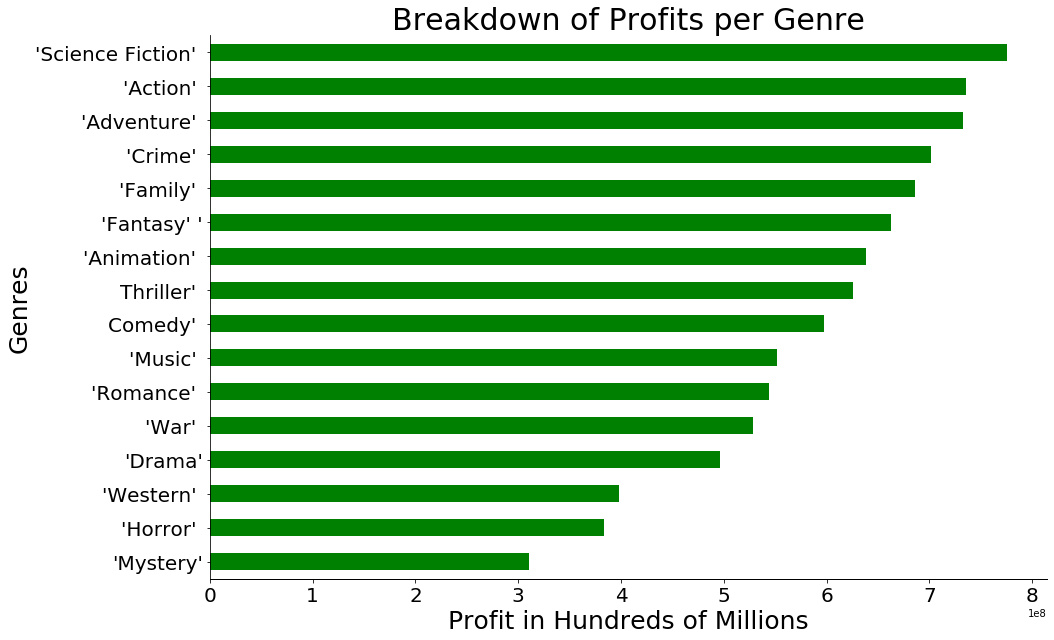

In [118]:
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

y = df_gp['Unnamed: 1']
x = df_gp['Unnamed: 0.1']
# colors = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,)

barh = pd.DataFrame(np.array(y).T, index=x.values).plot(kind='barh', figsize=(15,10), color='green',legend=None)
plt.ylabel('Genres', fontsize=25)
plt.yticks(fontsize = 20)
plt.xlabel('Profit in Hundreds of Millions',fontsize=25)
plt.xticks(fontsize = 20)
plt.title('Breakdown of Profits per Genre',fontsize=30)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(1)
barh.spines['left'].set_visible(True)
fig.savefig('foo.png',transparent = True)
plt.show()